In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('./seeds.csv')
z=train.columns[:-1]
train.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
# Get mean of each attribute for each class
C_1=train[train['class']==1][train.columns[:-1]]
mu_1=np.mean(C_1)
C_2=train[train['class']==2][train.columns[:-1]]
mu_2=np.mean(C_2)
C_3=train[train['class']==3][train.columns[:-1]]
mu_3=np.mean(C_3)
C_all=train[train.columns[:-1]]
mu_all=np.mean(C_all)


In [4]:
#print(np.array(train[train['class']==1])[0])
S_1 = np.zeros(shape=(C_1.shape[1],C_1.shape[1]))
S_2 = np.zeros(shape=(C_2.shape[1],C_2.shape[1]))
S_3 = np.zeros(shape=(C_3.shape[1],C_3.shape[1]))

for row in np.array(C_1):
    row = np.array(row).reshape(7,1) - np.array(mu_1).reshape(7,1)
    S_1 += row@row.T
for row in np.array(C_2):
    row = np.array(row).reshape(7,1) - np.array(mu_2).reshape(7,1)
    S_2 += row@row.T
for row in np.array(C_3):
    row = np.array(row).reshape(7,1) - np.array(mu_3).reshape(7,1)
    S_3 += row@row.T
S_W=S_1+S_2+S_3

In [5]:
S_B = np.zeros(shape=(C_3.shape[1],C_3.shape[1]))
S_B += C_1.shape[0]*(np.array(mu_1)-np.array(mu_all))@(np.array(mu_1)-np.array(mu_all)).T
S_B += C_2.shape[0]*(np.array(mu_2)-np.array(mu_all))@(np.array(mu_2)-np.array(mu_all)).T
S_B += C_3.shape[0]*(np.array(mu_3)-np.array(mu_all))@(np.array(mu_3)-np.array(mu_all)).T


In [6]:
from numpy import linalg
unsorted_eigvals, unsorted_eigvecs = np.linalg.eig(np.linalg.inv(S_W)@S_B)

unsorted_eigvals = np.real(unsorted_eigvals)
unsorted_eigvecs = np.real(unsorted_eigvecs)

# Get indexs sorted descending order about eigenvalues
# Since argsort doesn't support descending order, I put '-unsorted_eigvals' 
# instead of 'unsorted_eigvals'
sorting = np.argsort(-unsorted_eigvals)


# Sort eigenvalues in descending order
sorted_eigvals = unsorted_eigvals[sorting]

# Change the order of eigenvectors suitably for the order of eigenvalues
# Since eigenvectors are columns of unsorted_eigvecs,
# I used sorted index for column index instead of row index
sorted_eigvecs=unsorted_eigvecs[:,sorting]

print(sorted_eigvals)

[ 3.77067067e+05  1.89285220e-15  0.00000000e+00 -8.24891415e-14
 -8.24891415e-14 -6.00828081e-12 -6.00828081e-12]


In [7]:
W = np.vstack((np.array(sorted_eigvecs[0]),np.array(sorted_eigvecs[1])))
W=W.T

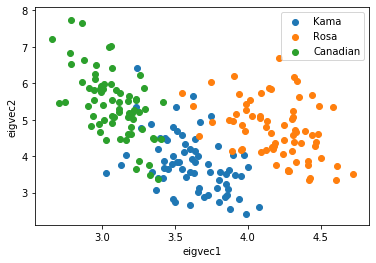

In [8]:
twodim_X1=pd.DataFrame(C_1@W)
twodim_X2=pd.DataFrame(C_2@W)
twodim_X3=pd.DataFrame(C_3@W)

plt.xlabel('eigvec1')
plt.ylabel('eigvec2')

plt.scatter(np.real(twodim_X1.iloc[:,0].to_numpy()),
    np.real(twodim_X1.iloc[:,1].to_numpy()),label='Kama')
plt.scatter(np.real(twodim_X2.iloc[:,0].to_numpy()),
    np.real(twodim_X2.iloc[:,1].to_numpy()),label='Rosa')
plt.scatter(np.real(twodim_X3.iloc[:,0].to_numpy()),
    np.real(twodim_X3.iloc[:,1].to_numpy()),label='Canadian')
plt.legend()

In [9]:
X=train[train.columns[:-1]]
y=train['class']
LDA = LinearDiscriminantAnalysis()
X_lda = LDA.fit_transform(X, y)

(210, 2)


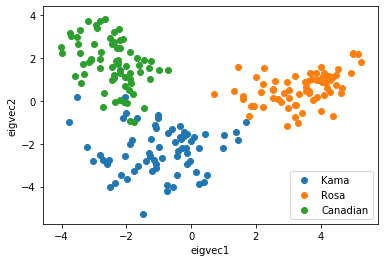

In [10]:
print(X_lda.shape)
plt.xlabel('eigvec1')
plt.ylabel('eigvec2')

plt.scatter(np.real( X_lda[y==1][:,0]),
    np.real( X_lda[y==1][:,1]),label='Kama')
plt.scatter(np.real( X_lda[y==2][:,0]),
    np.real( X_lda[y==2][:,1]),label='Rosa')
plt.scatter(np.real( X_lda[y==3][:,0]),
    np.real( X_lda[y==3][:,1]),label='Canadian')
plt.legend()

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='randomized', whiten=True)
X_pca = pca.fit_transform(X, y)

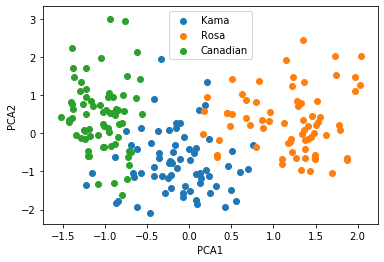

In [12]:
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.scatter(np.real( X_pca[y==1][:,0]),
    np.real( X_pca[y==1][:,1]),label='Kama')
plt.scatter(np.real( X_pca[y==2][:,0]),
    np.real( X_pca[y==2][:,1]),label='Rosa')
plt.scatter(np.real( X_pca[y==3][:,0]),
    np.real( X_pca[y==3][:,1]),label='Canadian')
plt.legend()